# TechCrush DataScience Task 3: Pizza Sales Data Analysis
# Name: Oluwanisola Adedamola Daniel


In [37]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Display settings
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

#Load the Datasets
orders = pd.read_csv("orders.csv")
order_details = pd.read_csv("order_details.csv")
pizzas = pd.read_csv("pizzas.csv")
pizza_types = pd.read_csv("pizza_types.csv")

#Cleanup
orders['date'] = pd.to_datetime(orders['date'])
orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S').dt.time


# Merge all the datasets
df = order_details.merge(orders, on='order_id') \
                  .merge(pizzas, on='pizza_id') \
                  .merge(pizza_types, on='pizza_type_id')

# Calculate Sales
df['total_price'] = df['price'] * df['quantity']
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total_price,hour,weekday,month
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75,21,Thursday,December
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95,21,Thursday,December
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00,21,Thursday,December
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25,22,Thursday,December


# ANALYSIS

In [13]:
 

# 1 Total Revenue
total_revenue = df['total_price'].sum()
print("Total Revenue: $", round(total_revenue, 2))

Total Revenue: $ 817860.05


Insight: The pizza business generated substantial revenue over the year, indicating strong demand and successful product pricing

In [15]:
# 2 Total Quantity Sold
total_quantity = df['quantity'].sum()
print("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 49574


Insight:A high volume of pizzas was sold. This reflects good product demand.

In [17]:
# 3 Total Orders
total_orders = df['order_id'].nunique()
print("Total Unique Orders:", total_orders)

Total Unique Orders: 21350


Insight: The number of unique orders reflects steady patronage, with indications that many customers order more than one pizza per visit.

In [21]:
# 4 Unique Pizza Types
unique_pizza_types = df['pizza_type_id'].nunique()
print("Total Pizza Types:", unique_pizza_types)

Total Pizza Types: 32


Insight: There is a  broad variety of pizza types, which provides customers with a range of choices and may cater to diverse taste preferences.

In [23]:
# 5 Average Pizza Price
avg_price = df[['pizza_id', 'price']].drop_duplicates()['price'].mean()
print("Average Pizza Price: $", round(avg_price, 2))

Average Pizza Price: $ 16.51


Insight: The average price of a pizza appears mid-range and it is affordable.

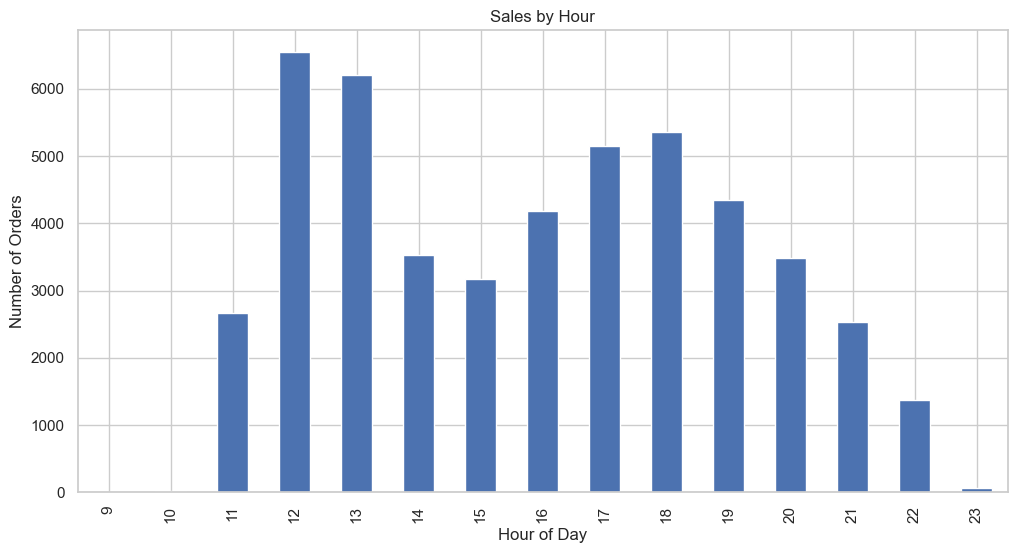

In [25]:
# 6 Peak Hours of Sales
df['hour'].value_counts().sort_index().plot(kind='bar', title='Sales by Hour')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()

Insight: Sales peak around launch and dinner time. This shows the necessity for timely production and staff availability during these hours.

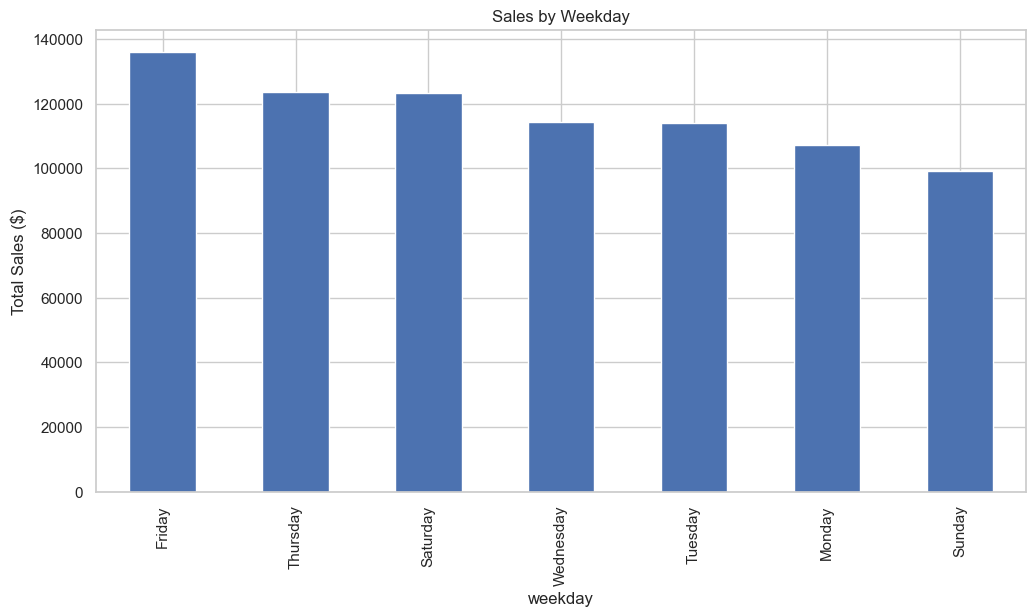

Top Day: Friday


In [27]:
# 7 Sales Made Each Day of the Week
sales_by_day = df.groupby('weekday')['total_price'].sum().sort_values(ascending=False)
sales_by_day.plot(kind='bar', title='Sales by Weekday')
plt.ylabel("Total Sales ($)")
plt.show()
print("Top Day:", sales_by_day.idxmax())

Friday records the highest sales, while Monday shows the lowest. This trend shows that the end-of-week days have more social gatherings and takeout orders.

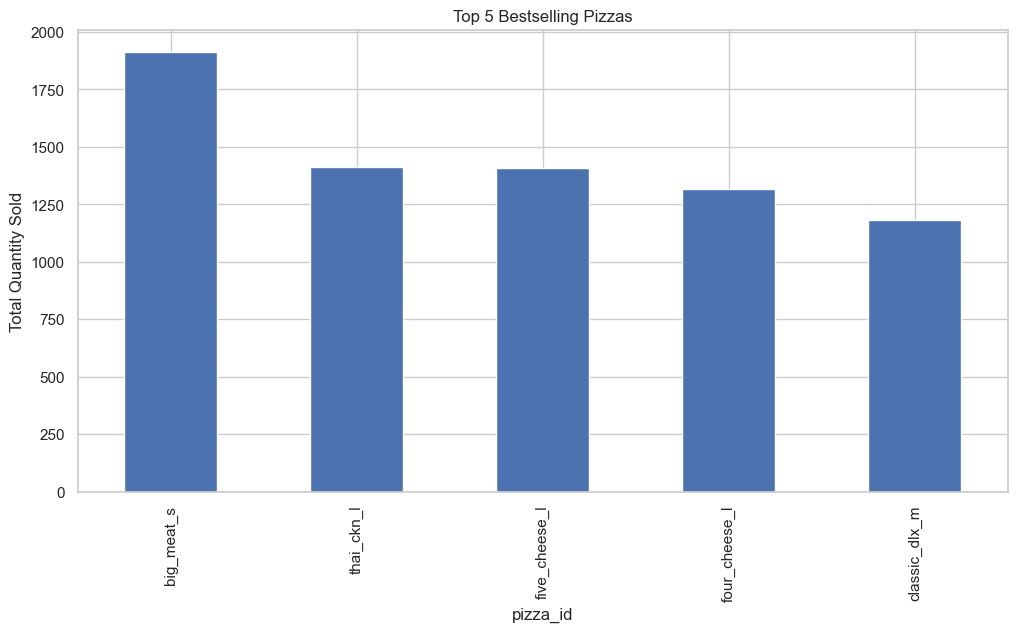

In [29]:
# 8 Top 5 Bestselling Pizzas
top5 = df.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).head(5)
top5.plot(kind='bar', title='Top 5 Bestselling Pizzas')
plt.ylabel("Total Quantity Sold")
plt.show()

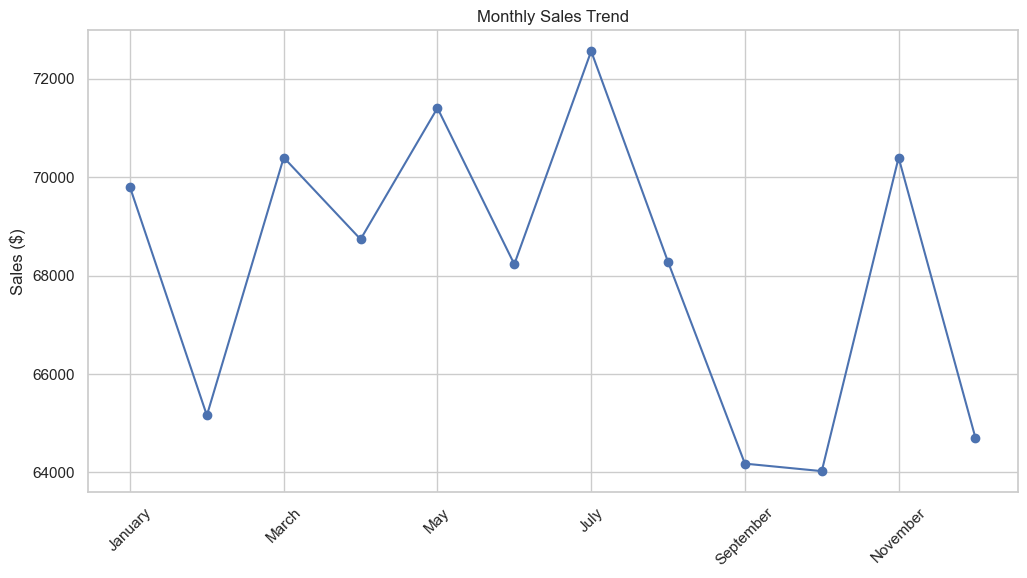

In [35]:
# 9 Monthly Sales Trend
monthly_sales = df.groupby('month')['total_price'].sum()
monthly_sales = monthly_sales.loc[pd.date_range(start='2021-01-01', periods=12, freq='ME').strftime('%B')]
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.show()

Insight: Sales went up in December and July, probably due to the holiday period.

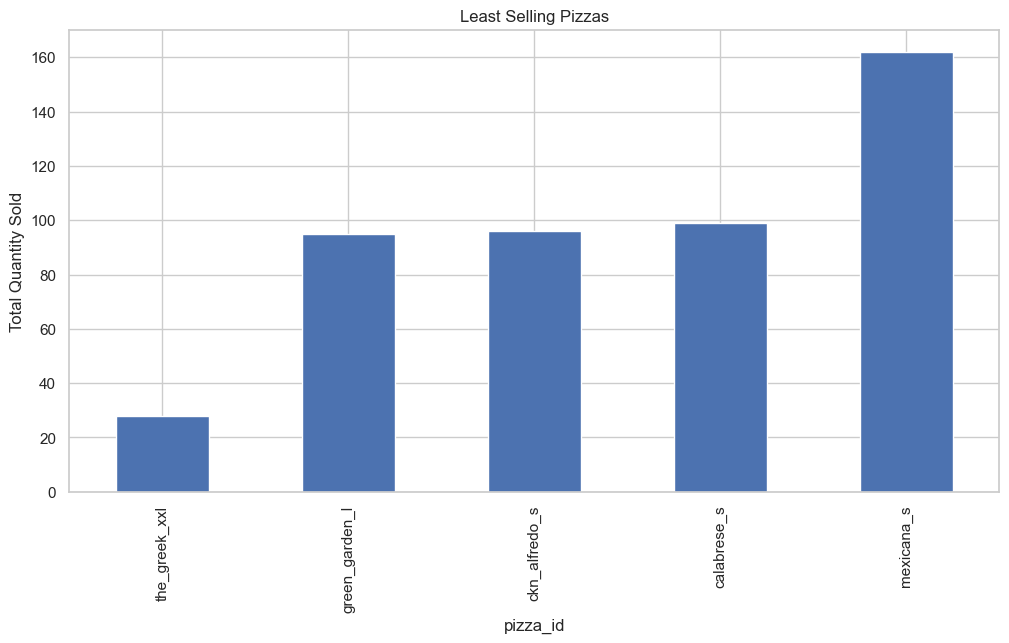

In [33]:
# 10 Yes there are pizza types that are not doing well on the menu
bottom5 = df.groupby('pizza_id')['quantity'].sum().sort_values().head(5)
bottom5.plot(kind='bar', title='Least Selling Pizzas')
plt.ylabel("Total Quantity Sold")
plt.show()

Insight: Some pizza types consistently went lower in sales, which may warrant reviewing their ingredients, marketing visibility, or necessity on the menu.